# Balance Calibration Experiment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

### Reading the Experiment Data

In [2]:
balance = pd.read_excel('balance.xlsx')
balance

,attempt,mass_g,voltage_mv
0,1,1,4.927688
1,2,5,24.574838
2,3,20,98.632956
3,4,22,108.397868
4,5,25,124.027213
5,6,50,247.811166
6,7,52,257.551185
7,8,55,271.610963
8,9,70,344.767244
9,10,100,494.131746


In [3]:
unknown_mass= 224.271 # The voltage output (mV) to figure out the unknown mass

### Mass vs Voltage Graph

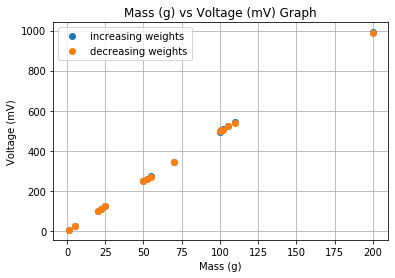

In [4]:
plt.plot(balance['mass_g'][:15], balance['voltage_mv'][:15],'o', label='increasing weights')
plt.plot(balance['mass_g'][15:], balance['voltage_mv'][15:],'o',label='decreasing weights')

plt.xlabel('Mass (g)')
plt.ylabel('Voltage (mV)')
plt.title('Mass (g) vs Voltage (mV) Graph')
plt.grid(True)
plt.legend()


## Calculations of calibration equation (for increasing weights)

In [5]:
clb_inc = pd.DataFrame(balance['mass_g'][:15]) # Creating new Dataframe for calculations, mass values are imported as x

clb_inc = clb_inc.rename(columns = {'mass_g':'x'}) # Renaming the column as x

clb_inc['y'] = balance['voltage_mv'][:15] # Voltage values are imported as y

clb_inc['x*y'] = clb_inc['x']*clb_inc['y'] # Calculating x*y

clb_inc['x^2'] = clb_inc['x']**2 # Calculating x^2

clb_inc

,x,y,x*y,x^2
0,1,4.927688,4.927688,1
1,5,24.574838,122.874190,25
2,20,98.632956,1972.659120,400
3,22,108.397868,2384.753096,484
4,25,124.027213,3100.680325,625
5,50,247.811166,12390.558300,2500
6,52,257.551185,13392.661620,2704
7,55,271.610963,14938.602965,3025
8,70,344.767244,24133.707080,4900
9,100,494.131746,49413.174600,10000


In [6]:
clb_inc.to_excel('clb_inc.xlsx') # Writing data in excel format for the report

### Coefficients of the linear calibration equation (y = ax + b) For increasing weights

In [7]:
a_inc = ((15*np.sum(clb_inc['x*y'])-np.sum(clb_inc['x'])*np.sum(clb_inc['y']))
         /(15*np.sum(clb_inc['x^2'])-(np.sum(clb_inc['x']))**2)) # The slope of the curve

b_inc = ((np.sum(clb_inc['y'])*np.sum(clb_inc['x^2'])-np.sum(clb_inc['x*y'])*np.sum(clb_inc['x']))
         /(15*np.sum(clb_inc['x^2'])-np.sum(clb_inc['x'])**2)) # Interception point on the y-axis

In [8]:
round(a_inc,6)

4.959416

In [9]:
round(b_inc, 6)

-0.448677

#### Calibration Equation: $y = 4.959416x - 0.448677 $

In [10]:
mass_inc = (unknown_mass - b_inc) / a_inc # Calculating the unknown mass using the given voltage output
round(mass_inc,6)

45.311721

In [11]:
mass_inc_force = mass_inc*10**(-3)*9.81 # Converting mass to force, g=9.81 m/s^2
round(mass_inc_force,6)

0.444508

#### Unknown Mass: 0.444508 N, 45.311721 g

##  Calculations of calibration equation (for decreasing weights)

In [12]:
clb_dec = pd.DataFrame(balance['mass_g'][15:]) # Creating new Dataframe for calculations, mass values are imported as x

clb_dec = clb_dec.rename(columns = {'mass_g':'x'}) # Renaming the column as x

clb_dec['y'] = balance['voltage_mv'][15:] # Voltage values are imported as y

clb_dec['x*y'] = clb_dec['x']*clb_dec['y'] # Calculating x*y

clb_dec['x^2'] = clb_dec['x']**2 # Calculating x^2

clb_dec

,x,y,x*y,x^2
15,200,986.396415,197279.283000,40000
16,110,540.958072,59505.387920,12100
17,105,522.940227,54908.723835,11025
18,102,503.360041,51342.724182,10404
19,101,503.787756,50882.563356,10201
20,100,499.026431,49902.643100,10000
21,70,345.265399,24168.577930,4900
22,55,270.210874,14861.598070,3025
23,52,257.994390,13415.708280,2704
24,50,246.678764,12333.938200,2500


In [13]:
clb_dec.to_excel('clb_dec.xlsx') # Writing data in excel format for the report

### Coefficients of the linear calibration equation (y = ax + b) For decreasing weights

In [14]:
a_dec = ((15*np.sum(clb_dec['x*y'])-np.sum(clb_dec['x'])*np.sum(clb_dec['y']))
         /(15*np.sum(clb_dec['x^2'])-(np.sum(clb_dec['x']))**2)) # The slope of the curve

b_dec = ((np.sum(clb_dec['y'])*np.sum(clb_dec['x^2'])-np.sum(clb_dec['x*y'])*np.sum(clb_dec['x']))
         /(15*np.sum(clb_dec['x^2'])-np.sum(clb_dec['x'])**2)) # Interception point on the y-axis

In [15]:
round(a_dec,6)

4.942524

In [16]:
round(b_dec, 6)

0.457789

#### Calibration Equation: $y=4.942524x + 0.457789$

In [17]:
mass_dec = (unknown_mass - b_dec) / a_dec # Calculating the unknown mass using the given voltage output
round(mass_dec,6)

45.283185

In [18]:
mass_dec_force = mass_dec*10**(-3)*9.81 # Converting mass to force, g=9.81 m/s^2
round(mass_dec_force,6)

0.444228

#### Unknown Mass: 0.444228 N, 45.283185 g

## Calculations for correlation coefficient (For increasing weights)

In [19]:
cor_inc = pd.DataFrame(balance['mass_g'][:15]) # Creating new Dataframe for calculations, mass values are imported as x

cor_inc = cor_inc.rename(columns = {'mass_g':'x'}) # Renaming the column as x

cor_inc['y'] = balance['voltage_mv'][:15] # Voltage values are imported as y

cor_inc['y-y_avg'] = cor_inc['y']-np.mean(cor_inc['y']) # Differences between y values and avarage y

cor_inc['(y-y_avg)^2'] = cor_inc['y-y_avg']**2 # Squares of the differences

cor_inc['y_c'] = a_inc*cor_inc['x'] + b_inc # Calculating y values using the calibration equation

cor_inc['y-y_c'] = cor_inc['y']-cor_inc['y_c'] # Differences between y values and calculated y values

cor_inc['(y-y_c)^2'] = cor_inc['y-y_c']**2 # Squares of the differences

cor_inc

,x,y,y-y_avg,(y-y_avg)^2,y_c,y-y_c,(y-y_c)^2
0,1,4.927688,-331.202669,109695.207644,4.510739,0.416949,0.173846
1,5,24.574838,-311.555519,97066.841129,24.348403,0.226435,0.051273
2,20,98.632956,-237.497401,56405.015260,98.739643,-0.106687,0.011382
3,22,108.397868,-227.732489,51862.086334,108.658475,-0.260607,0.067916
4,25,124.027213,-212.103144,44987.743497,123.536723,0.490490,0.240580
5,50,247.811166,-88.319191,7800.279416,247.522124,0.289042,0.083545
6,52,257.551185,-78.579172,6174.686199,257.440956,0.110229,0.012150
7,55,271.610963,-64.519394,4162.752142,272.319204,-0.708241,0.501605
8,70,344.767244,8.636887,74.595825,346.710444,-1.943200,3.776026
9,100,494.131746,158.001389,24964.439073,495.492924,-1.361178,1.852807


In [20]:
cor_inc.to_excel('cor_inc.xlsx') # Writing data in excel format for the report

### Calculating $\sigma_y$, $\sigma_{y,x}$ and $R$ (Correlation Coefficent) for increasing weights

In [21]:
y_std_inc = ((np.sum(cor_inc['(y-y_avg)^2']))/(15-1))**(1/2)
round(y_std_inc,6)

262.784879

$\sigma_y = 262.784879$ 

In [22]:
yx_std_inc = ((np.sum(cor_inc['(y-y_c)^2']))/(15-2))**(1/2)
round(yx_std_inc,6)

1.421159

$\sigma_{y,x} = 1.421159$

In [23]:
r_inc = (1-(yx_std_inc)**2/(y_std_inc)**2)**(1/2)
round(r_inc,6)

0.999985

$R = 0.999985$

## Calculations for correlation coefficient (For decreasing weights)

In [24]:
cor_dec = pd.DataFrame(balance['mass_g'][15:]) # Creating new Dataframe for calculations, mass values are imported as x

cor_dec = cor_dec.rename(columns = {'mass_g':'x'}) # Renaming the column as x

cor_dec['y'] = balance['voltage_mv'][15:] # Voltage values are imported as y

cor_dec['y-y_avg'] = cor_dec['y']-np.mean(cor_dec['y']) # Differences between y values and avarage y

cor_dec['(y-y_avg)^2'] = cor_dec['y-y_avg']**2 # Squares of the differences

cor_dec['y_c'] = a_dec*cor_dec['x'] + b_dec # Calculating y values using the calibration equation

cor_dec['y-y_c'] = cor_dec['y']-cor_dec['y_c'] # Differences between y values and calculated y values

cor_dec['(y-y_c)^2'] = cor_dec['y-y_c']**2 # Squares of the differences

cor_dec

,x,y,y-y_avg,(y-y_avg)^2,y_c,y-y_c,(y-y_c)^2
15,200,986.396415,650.506022,423158.084918,988.962515,-2.566100,6.584867
16,110,540.958072,205.067679,42052.753052,544.135388,-3.177316,10.095338
17,105,522.940227,187.049834,34987.640474,519.422770,3.517457,12.372503
18,102,503.360041,167.469648,28046.083068,504.595199,-1.235158,1.525616
19,101,503.787756,167.897363,28189.524570,499.652676,4.135080,17.098890
20,100,499.026431,163.136038,26613.366960,494.710152,4.316279,18.630265
21,70,345.265399,9.375006,87.890741,346.434443,-1.169044,1.366664
22,55,270.210874,-65.679519,4313.799190,272.296589,-2.085715,4.350206
23,52,257.994390,-77.896003,6067.787252,257.469018,0.525372,0.276016
24,50,246.678764,-89.211629,7958.714713,247.583971,-0.905207,0.819399


In [25]:
cor_dec.to_excel('cor_dec.xlsx') # Writing data in excel format for the report

### Calculating $\sigma_y$, $\sigma_{y,x}$ and $R$ (Correlation Coefficent) for decreasing weights

In [26]:
y_std_dec = ((np.sum(cor_dec['(y-y_avg)^2']))/(15-1))**(1/2)
round(y_std_dec,6)

261.896328

$\sigma_y = 261.896328$ 

In [27]:
yx_std_dec = ((np.sum(cor_dec['(y-y_c)^2']))/(15-2))**(1/2)
round(yx_std_dec,6)

2.384894

$\sigma_{y,x} = 2.384894$

In [28]:
r_dec = (1-(yx_std_dec)**2/(y_std_dec)**2)**(1/2)
round(r_dec,6)

0.999959

$R = 0.999959$